# Workshop: Olympic Medals

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Olympic_rings_without_rims.svg/1920px-Olympic_rings_without_rims.png" width=300>

First clone the repository at [https://github.com/daniprec/BAM-Coding-Lab](https://github.com/daniprec/BAM-Coding-Lab)

You will find the data inside `data/olympics`.


---

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from olympics import load_and_preprocess

In [5]:
df = load_and_preprocess(path_csv="../data/olympics/olympics_medals.csv")

## 📊 Using the Data

### ⚽ Sport Events

**Exercise:** Find how many sport events there are. Ignore gender, i.e. "Football, Men" and "Football, Women" count only as one.

In [6]:
print(df["event_simple"].value_counts())

event_simple
Football                            9385
Ice Hockey                          6751
Hockey                              6333
Singles                             6028
Individual                          5528
                                    ... 
Lightweight Coxless Pairs, Mixed       2
Ball Throw for Accuracy                1
Special Scratch Pole Vault #1          1
Aeronautics, Open                      1
Retrieval by Hook                      1
Name: count, Length: 553, dtype: int64


**Exercise:** Plot a graph that shows the number of different sport events per year. Make a distinction between Summer and Winter olympics (and any other kind if any).

In [7]:
events_per_year = df.groupby(["year", "season"], as_index=False)["event_simple"].nunique()

events_per_year.head(5)

,year,season,event_simple
0,1896,Summer,39
1,1900,Summer,147
2,1904,Summer,120
3,1906,Intercalated,12
4,1908,Summer,82


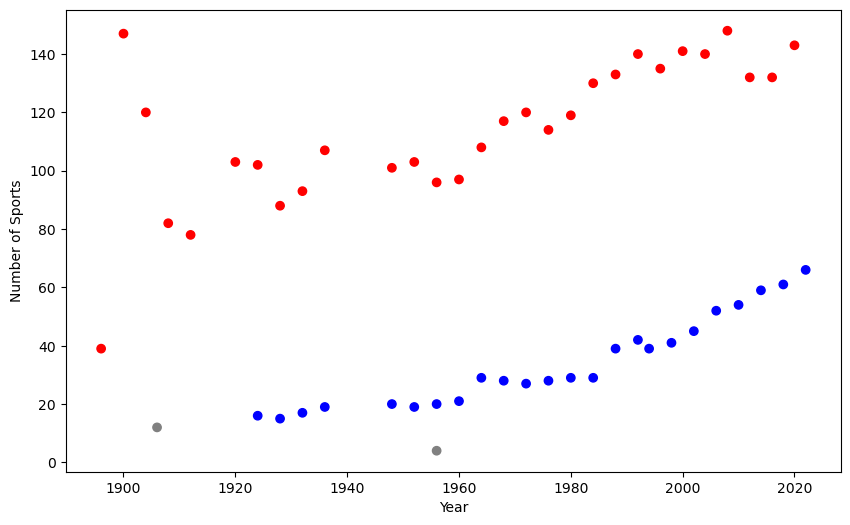

In [8]:
# Color by season
def color_season(season: str) -> str:
  if season.lower() == "summer":
    return "red"
  elif season.lower() == "winter":
    return "blue"
  else:
    return "gray"

# Create a scatter plot
color = events_per_year["season"].map(color_season)

plt.figure(figsize=(10, 6))
plt.scatter(events_per_year["year"], events_per_year["event_simple"], c=color)
plt.xlabel("Year")
plt.ylabel("Number of Sports")
plt.show()

### 🏅 Medalists

**Exercise:** Find the athlete with the most medals. How many do they have?

In [9]:
mask_medal = df["medal"] != "No"
medal_by_athletes = df.loc[mask_medal, "athlete"].value_counts()
top_athlete = medal_by_athletes.idxmax()

print(f"Top athlete is {top_athlete} with {medal_by_athletes[top_athlete]}")

Top athlete is Michael Phelps with 28


**Exercise:** Compute the number of gold medals won by each country. Make a bar plot with the top 10 countries.

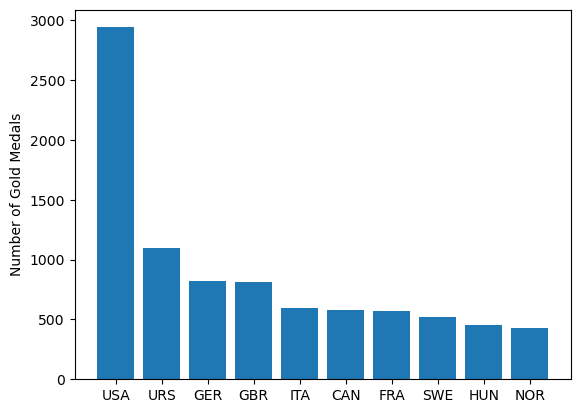

In [10]:
mask_gold = df["medal"] == "Gold"
gold_by_country = df.loc[mask_gold, "country_noc"].value_counts()

plt.bar(gold_by_country.index[:10], gold_by_country.values[:10])
plt.ylabel("Number of Gold Medals")
plt.show()
plt.close()

**Exercise:** Now do a stacked bar plot with the number of gold, silver and bronze medals. Show the 10 countries with the biggest total amount.

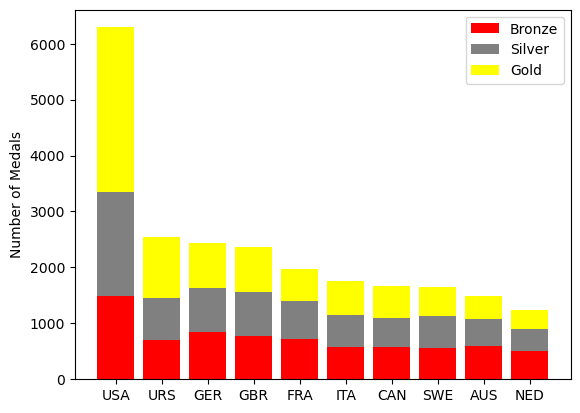

In [11]:
mask_medals = df["medal"] != "No"
medals_by_country = df.loc[mask_medals, "country_noc"].value_counts()
top_countries = medals_by_country.index[:10].tolist()

mask_bronze = df["medal"] == "Bronze"
bronze_by_country = df.loc[mask_bronze, "country_noc"].value_counts()
bronze = bronze_by_country[top_countries]
plt.bar(top_countries, bronze, color="red", label="Bronze")

mask_silver = df["medal"] == "Silver"
silver_by_country = df.loc[mask_silver, "country_noc"].value_counts()
silver = silver_by_country[top_countries]
plt.bar(top_countries, silver, bottom=bronze, color="gray", label="Silver")

mask_gold = df["medal"] == "Gold"
gold_by_country = df.loc[mask_gold, "country_noc"].value_counts()
gold = gold_by_country[top_countries]
plt.bar(top_countries, gold, bottom=bronze+silver, color="yellow", label="Gold")

plt.legend()
plt.ylabel("Number of Medals")
plt.show()
plt.close()

---

### ➕ Adding More Data

Merge both datasets and save the result.

In [12]:
path_csv = path_folder + "/olympics_medals_2024.csv"

df_new = pd.read_csv(path_csv)
df_new.head(5)

NameError: name 'path_folder' is not defined

In [19]:
df_new["medal_code"].value_counts()

medal_code
3    381
2    327
1    326
Name: count, dtype: int64